In [1]:
from keras.datasets import imdb
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words= 10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
print(type([max(sequence) for sequence in train_data]))
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
len(reverse_word_index)

88584

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

xtrain = vectorize_sequences(train_data)
xtest = vectorize_sequences(test_data)

In [8]:
xtrain[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
xtrain.shape

(25000, 10000)

In [10]:
ytrain = np.asarray(train_labels).astype('float32')
ytest = np.asarray(test_labels).astype('float32')

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer= optimizers.RMSprop(learning_rate= 0.001),
              loss = losses.binary_crossentropy,
              metrics= [metrics.binary_accuracy])

In [13]:
xval = xtrain[:10000]
partial_xtrain = xtrain[10000:]

yval = ytrain[:10000]
partial_ytrain = ytrain[10000:]

In [ ]:
history = model.fit(partial_xtrain,
                    partial_ytrain,
                    epochs=100,
                    batch_size= 512,
                    validation_data=(xval, yval))

Epoch 1/100
30/30 [==============================] - 1s 28ms/step - loss: 0.0056 - binary_accuracy: 0.9998 - val_loss: 0.6147 - val_binary_accuracy: 0.8688
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0064 - binary_accuracy: 0.9998 - val_loss: 0.6398 - val_binary_accuracy: 0.8686
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0087 - binary_accuracy: 0.9978 - val_loss: 0.6610 - val_binary_accuracy: 0.8684
Epoch 4/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0033 - binary_accuracy: 0.9999 - val_loss: 0.6773 - val_binary_accuracy: 0.8686
Epoch 5/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0056 - binary_accuracy: 0.9991 - val_loss: 0.6996 - val_binary_accuracy: 0.8684
Epoch 6/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0024 - binary_accuracy: 0.9999 - val_loss: 0.7146 - val_binary_accuracy: 0.8676
Epoch 7/100
30/30 [==============================] - 0s 11ms/ste

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

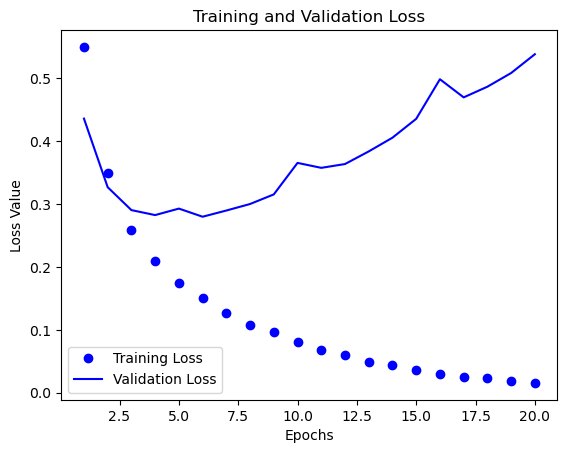

In [17]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = "Training Loss")
plt.plot(epochs, val_loss_values, 'b', label = "Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

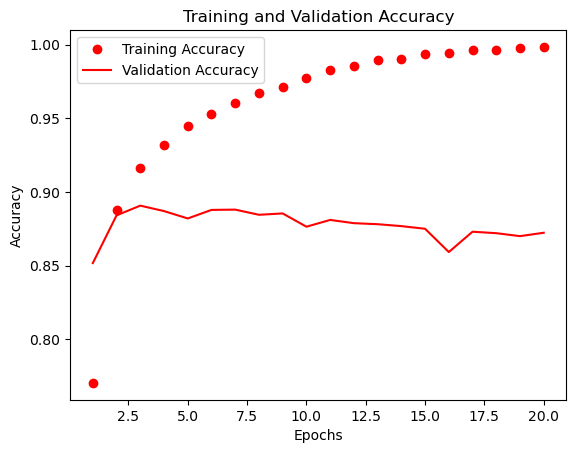

In [18]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc_values, 'ro', label = "Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label = "Validation Accuracy")

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
model.fit(partial_xtrain,
          partial_ytrain,
          epochs= 3,
          batch_size= 512,
          validation_data=(xval,yval))

Epoch 1/3
30/30 [==============================] - 1s 23ms/step - loss: 0.0100 - binary_accuracy: 0.9995 - val_loss: 0.5617 - val_binary_accuracy: 0.8665
Epoch 2/3
30/30 [==============================] - 0s 12ms/step - loss: 0.0123 - binary_accuracy: 0.9990 - val_loss: 0.5809 - val_binary_accuracy: 0.8692
Epoch 3/3
30/30 [==============================] - 0s 11ms/step - loss: 0.0135 - binary_accuracy: 0.9974 - val_loss: 0.6007 - val_binary_accuracy: 0.8704


In [20]:
np.set_printoptions(suppress= True)
result = model.predict(xtest)

782/782 [==============================] - 1s 1ms/step


In [21]:
result

array([[0.00939089],
       [1.        ],
       [0.6310244 ],
       ...,
       [0.00322544],
       [0.00947683],
       [0.95417684]], dtype=float32)

In [22]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [23]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, ytest)

In [24]:
mae

0.14016

In [25]:
def predict_sentiment(review):
    tokens = review.split()
    word_index = imdb.get_word_index()
    
    sequence = [word_index.get(word, 0) for word in tokens]
    vectorized_sequence = vectorize_sequences([sequence])

    prediction = model.predict(vectorized_sequence)

    return prediction[0][0]

In [26]:
good_review = "This movie was fantastic! I loved every moment of it."
bad_review = "Waste of time. Terrible acting and a predictable plot."

# Predict sentiment for the example reviews
good_sentiment = predict_sentiment(good_review)
bad_sentiment = predict_sentiment(bad_review)

print("good review:", good_sentiment)
print("bad review:", bad_sentiment)

1/1 [==============================] - 0s 15ms/step
good review: 0.63896453
bad review: 0.8039553
